# 商业数据分析与挖掘-Final Project

## 1.数据处理与可视化

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import mplfinance as mpf  #安装一个三方库：mplfinance


warnings.filterwarnings('ignore')

plt.rcParams["font.sans-serif"]=["SimHei"] # 设置字体
plt.rcParams["axes.unicode_minus"]=False # 该语句解决图像中的“-”负号的乱码问题

读取数据集并展示

In [2]:
# 读取数据集，skiprows参数表示忽略数据的前两行
df = pd.read_excel(r'平安银行(000001.SZ)_每日行情数据统计.xlsx', skiprows=2)

# 显示读入数据的前十行
df.head(10)

,交易日期,开盘价(元),最高价(元),最低价(元),收盘价(元),收盘价(后复权)(元),涨跌(元),涨跌幅,成交量(股),成交笔数(笔),成交额(万元),换手率,总市值(万元)
0,1993-06-01,29.10,29.50,28.60,28.85,116.94,-0.25,-0.85%,"1,877,100",0,"5,445.21",1.00%,"777,270.64"
1,1993-06-02,28.80,29.10,28.60,29.00,117.55,0.15,0.51%,"1,148,400",0,"3,307.81",0.61%,"781,311.91"
2,1993-06-03,29.00,29.20,28.90,29.10,117.96,0.10,0.34%,"1,506,000",0,"4,373.29",0.80%,"784,006.09"
3,1993-06-04,29.10,29.15,28.80,28.90,117.15,-0.20,-0.68%,"1,124,000",0,"3,253.10",0.60%,"778,617.73"
4,1993-06-05,28.90,28.90,28.90,28.90,117.15,0.00,0.00%,"77,493",0,223.95,0.04%,"778,617.73"
5,1993-06-07,29.00,29.05,28.60,28.80,116.74,-0.10,-0.34%,"707,700",0,"2,043.54",0.38%,"775,923.55"
6,1993-06-08,28.80,28.85,28.60,28.70,116.33,-0.10,-0.34%,"552,100",0,"1,586.19",0.29%,"773,229.37"
7,1993-06-09,28.75,28.80,28.15,28.30,114.71,-0.40,-1.39%,"572,700",0,"1,620.51",0.30%,"762,452.65"
8,1993-06-10,28.30,28.30,28.00,28.25,114.51,-0.05,-0.17%,"421,700",0,"1,189.45",0.22%,"761,105.56"
9,1993-06-11,28.20,28.20,27.65,27.75,112.48,-0.50,-1.76%,"750,400",0,"2,099.27",0.40%,"747,634.67"


### 1.1 数据处理

#### 1.1.1 缺失值处理

In [3]:
# 查看缺失值
# 结果显示，数据中存在缺失值情况
df.isnull().sum()

交易日期           1
开盘价(元)         2
最高价(元)         2
最低价(元)         2
收盘价(元)         2
收盘价(后复权)(元)    2
涨跌(元)          2
涨跌幅            2
成交量(股)         2
成交笔数(笔)        2
成交额(万元)        2
换手率            2
总市值(万元)        2
dtype: int64

In [4]:
# 查看含缺失值行，观察具体情况。
# 结果显示，这两行没实际意义，因此不需要进行填充，直接删除

df[df.isna().any(axis=1)]

,交易日期,开盘价(元),最高价(元),最低价(元),收盘价(元),收盘价(后复权)(元),涨跌(元),涨跌幅,成交量(股),成交笔数(笔),成交额(万元),换手率,总市值(万元)
7303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7304,数据来源：同花顺iFinD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 删除含缺失值的数据

df = df[~df.isna().any(axis=1)]

#### 1.1.2 数据类型处理

In [6]:
# 显示数据的类型
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7303 entries, 0 to 7302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   交易日期         7303 non-null   object 
 1   开盘价(元)       7303 non-null   float64
 2   最高价(元)       7303 non-null   float64
 3   最低价(元)       7303 non-null   float64
 4   收盘价(元)       7303 non-null   float64
 5   收盘价(后复权)(元)  7303 non-null   object 
 6   涨跌(元)        7303 non-null   float64
 7   涨跌幅          7303 non-null   object 
 8   成交量(股)       7303 non-null   object 
 9   成交笔数(笔)      7303 non-null   object 
 10  成交额(万元)      7303 non-null   object 
 11  换手率          7303 non-null   object 
 12  总市值(万元)      7303 non-null   object 
dtypes: float64(5), object(8)
memory usage: 798.8+ KB


In [7]:
# 设置日期数据类型
df.loc[:, '交易日期'] = pd.to_datetime(df.loc[:, '交易日期'])

#### Excel数据集的部分数据带有千分位分隔符，需要处理为数值形式

In [8]:
# 收盘价(后复权)、涨跌幅、成交量、成交笔数、成交额、换手率、总市值现在是字符形式，需转为数值
def f(x):
    try:
        x = x.replace(',', '')
    except:
        x = x 
    return float(x)

df.loc[:, '收盘价(后复权)(元)'] = df.loc[:, '收盘价(后复权)(元)'].map(f)

df["涨跌幅"] = df["涨跌幅"].str.rstrip("%").astype(float) / 100

def f(x):
    try:
        x = x.replace(',', '')
    except:
        x = x 
    return int(x)

df.loc[:, '成交量(股)'] = df.loc[:, '成交量(股)'].map(f)

def f(x):
    try:
        x = x.replace(',', '')
    except:
        x = x 
    return int(x)

df.loc[:, '成交笔数(笔)'] = df.loc[:, '成交笔数(笔)'].map(f)

def f(x):
    try:
        x = x.replace(',', '')
    except:
        x = x 
    return float(x)

df.loc[:, '成交额(万元)'] = df.loc[:, '成交额(万元)'].map(f)

df["换手率"] = df["换手率"].str.rstrip("%").astype(float) / 100

def f(x):
    try:
        x = x.replace(',', '')
    except:
        x = x 
    return float(x)

df.loc[:, '总市值(万元)'] = df.loc[:, '总市值(万元)'].map(f)

In [9]:
PAB = df.loc[:, ['交易日期', '开盘价(元)', '最高价(元)', '最低价(元)', '收盘价(元)', '收盘价(后复权)(元)', '涨跌(元)', '涨跌幅', '成交量(股)', '成交笔数(笔)', '成交额(万元)', '换手率', '总市值(万元)']].copy()
PAB.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Swing', 'Swing%','Volume', 'No.', 'Turnover', 'Turnover%', 'MV' ]
# 显示处理后数据的前十行
PAB.head(10)

,Date,Open,High,Low,Close,Adj Close,Swing,Swing%,Volume,No.,Turnover,Turnover%,MV
0,1993-06-01,29.10,29.50,28.60,28.85,116.94,-0.25,-0.0085,1877100,0,5445.21,0.0100,777270.64
1,1993-06-02,28.80,29.10,28.60,29.00,117.55,0.15,0.0051,1148400,0,3307.81,0.0061,781311.91
2,1993-06-03,29.00,29.20,28.90,29.10,117.96,0.10,0.0034,1506000,0,4373.29,0.0080,784006.09
3,1993-06-04,29.10,29.15,28.80,28.90,117.15,-0.20,-0.0068,1124000,0,3253.10,0.0060,778617.73
4,1993-06-05,28.90,28.90,28.90,28.90,117.15,0.00,0.0000,77493,0,223.95,0.0004,778617.73
5,1993-06-07,29.00,29.05,28.60,28.80,116.74,-0.10,-0.0034,707700,0,2043.54,0.0038,775923.55
6,1993-06-08,28.80,28.85,28.60,28.70,116.33,-0.10,-0.0034,552100,0,1586.19,0.0029,773229.37
7,1993-06-09,28.75,28.80,28.15,28.30,114.71,-0.40,-0.0139,572700,0,1620.51,0.0030,762452.65
8,1993-06-10,28.30,28.30,28.00,28.25,114.51,-0.05,-0.0017,421700,0,1189.45,0.0022,761105.56
9,1993-06-11,28.20,28.20,27.65,27.75,112.48,-0.50,-0.0176,750400,0,2099.27,0.0040,747634.67


#### 1.1.3 数据导出

In [10]:
# 创建 ExcelWriter 对象
writer = pd.ExcelWriter('stock_price_cleaned.xlsx', engine='xlsxwriter')

# 将数据写入 Excel 文件
PAB.to_excel(writer, index=False, sheet_name='Sheet1')

# 获取 Excel 文件的工作表对象
workbook = writer.book
worksheet = writer.sheets['Sheet1']

# 设置日期时间列的格式
date_format = workbook.add_format({'num_format': 'yyyy-mm-dd'})
worksheet.set_column('A:A', None, date_format)

# 保存并关闭 Excel 文件
writer.save()

### 1.2 数据可视化

#### 1.2.1 绘制基于收盘价的历史股价走势图

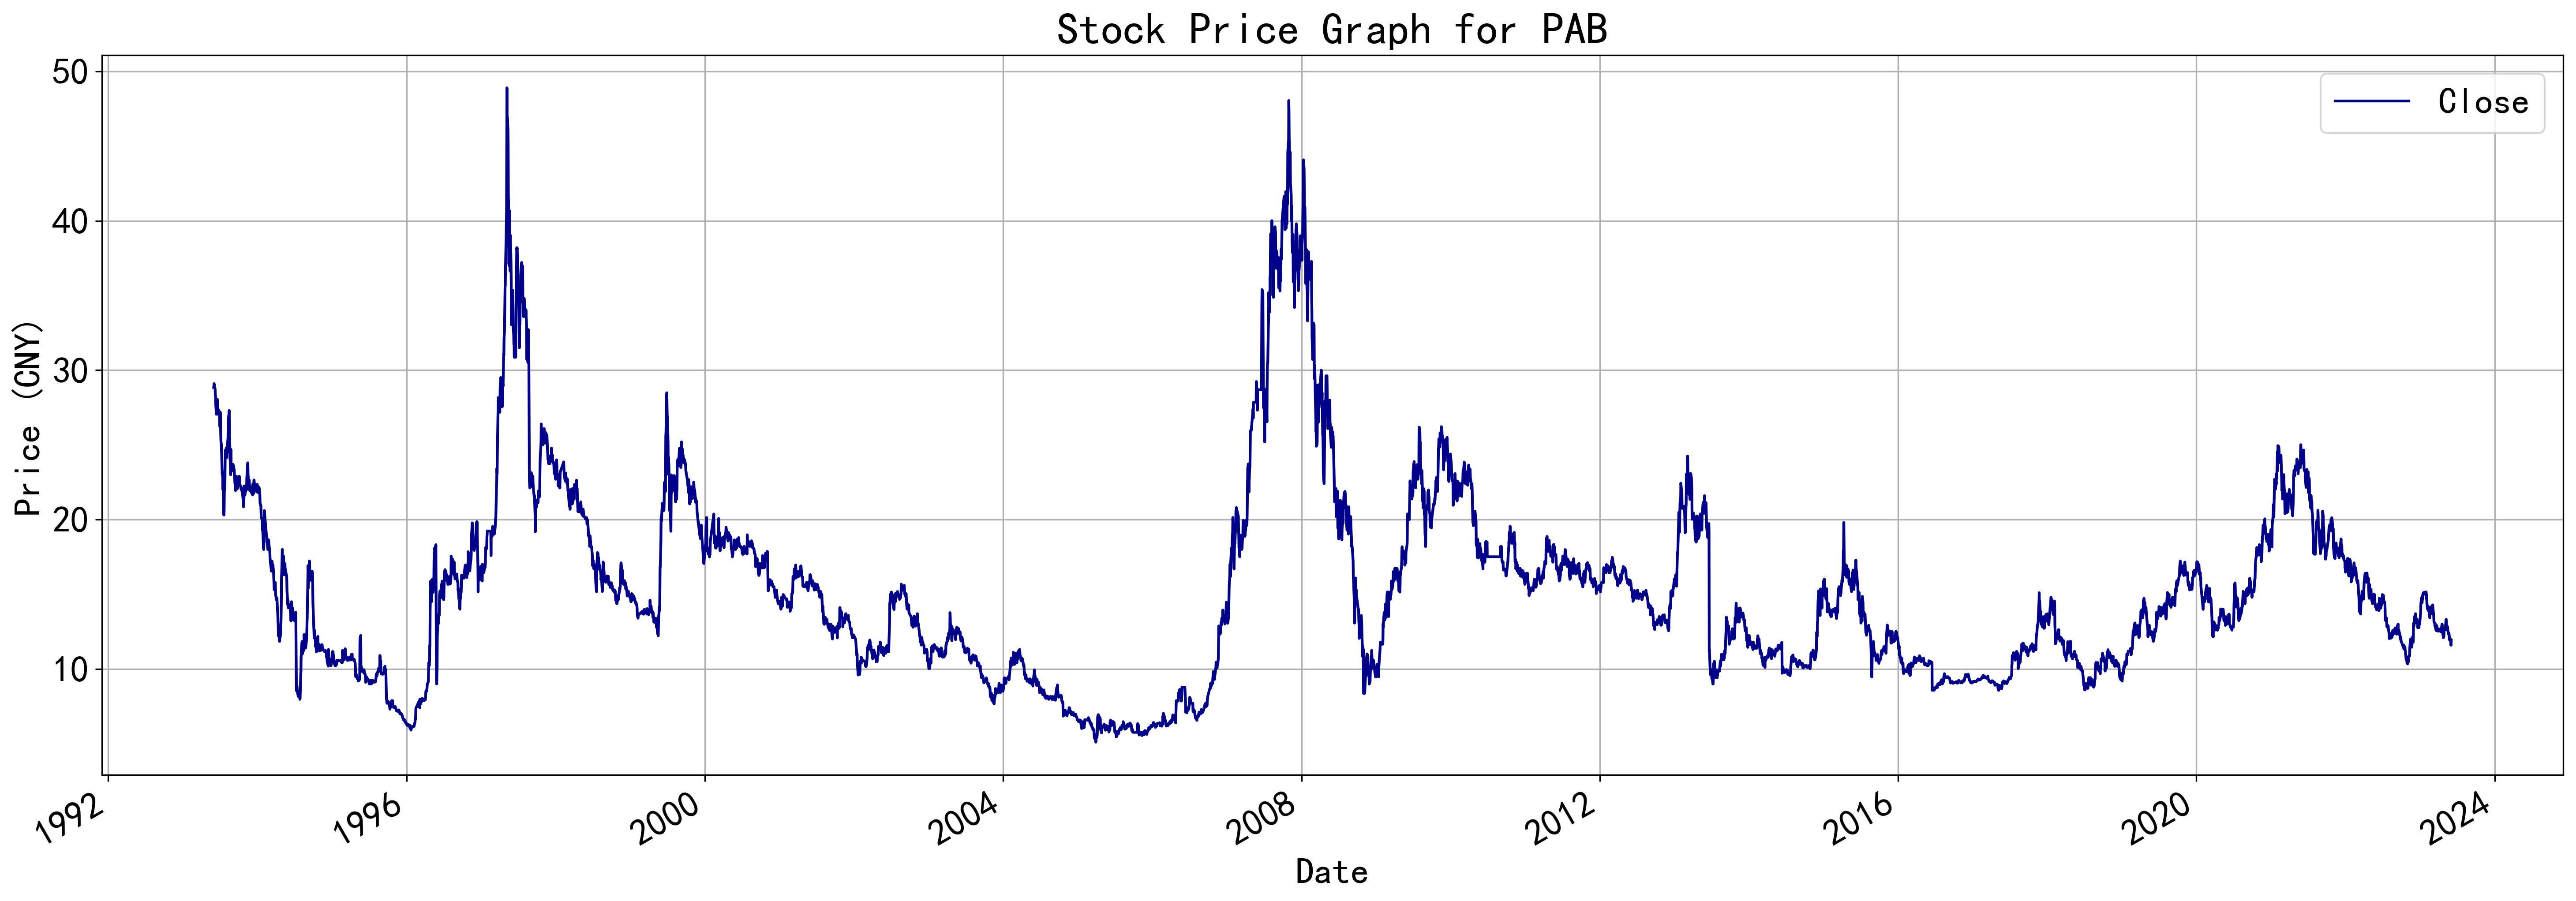

In [11]:
# 设置图片字体大小
mpl.rcParams['font.size'] = 20
# 分辨率参数-dpi，画布大小参数-figsize
plt.figure(dpi=300,figsize=(24,8))
# 设置日期列为index
PAB = PAB.set_index('Date')
# 获取折线图对象
line_plot = PAB["Close"].plot(grid=True)
# 设置折线颜色为深灰色
line_plot.lines[0].set_color('darkblue')
# 添加标题
plt.title("Stock Price Graph for PAB", fontweight='bold')
# 添加纵轴标签
plt.ylabel("Price (CNY)", fontweight='bold') 
# 添加图例
plt.legend()
# 显示图形
plt.show()

+ 由于上市公司盈利后，会通过分红（即现金分红、送转股票两种方式）把利润回馈给股东。
+ 因此，经过除权、除息后，都会导致股价下调，同时股票走势会出现明显缺口。
#### 但本质上，这是由于分红送股等原因引起，如果不进行修正，人们就无法判断股价真实的股价涨幅。

#### 1.2.2 绘制基于收盘价(后复权)的历史股价走势图

##### 为了修正价格缺口，需要用“复权”计算，来观察股价的历史真实走势。
+ 采用后复权是指以除权前最后一天的价格点为基础，把除权后的数据进行复权。
+ 尤其是观察长期的股价走势，选择后复权可以更真实、准确地反映股价涨跌。

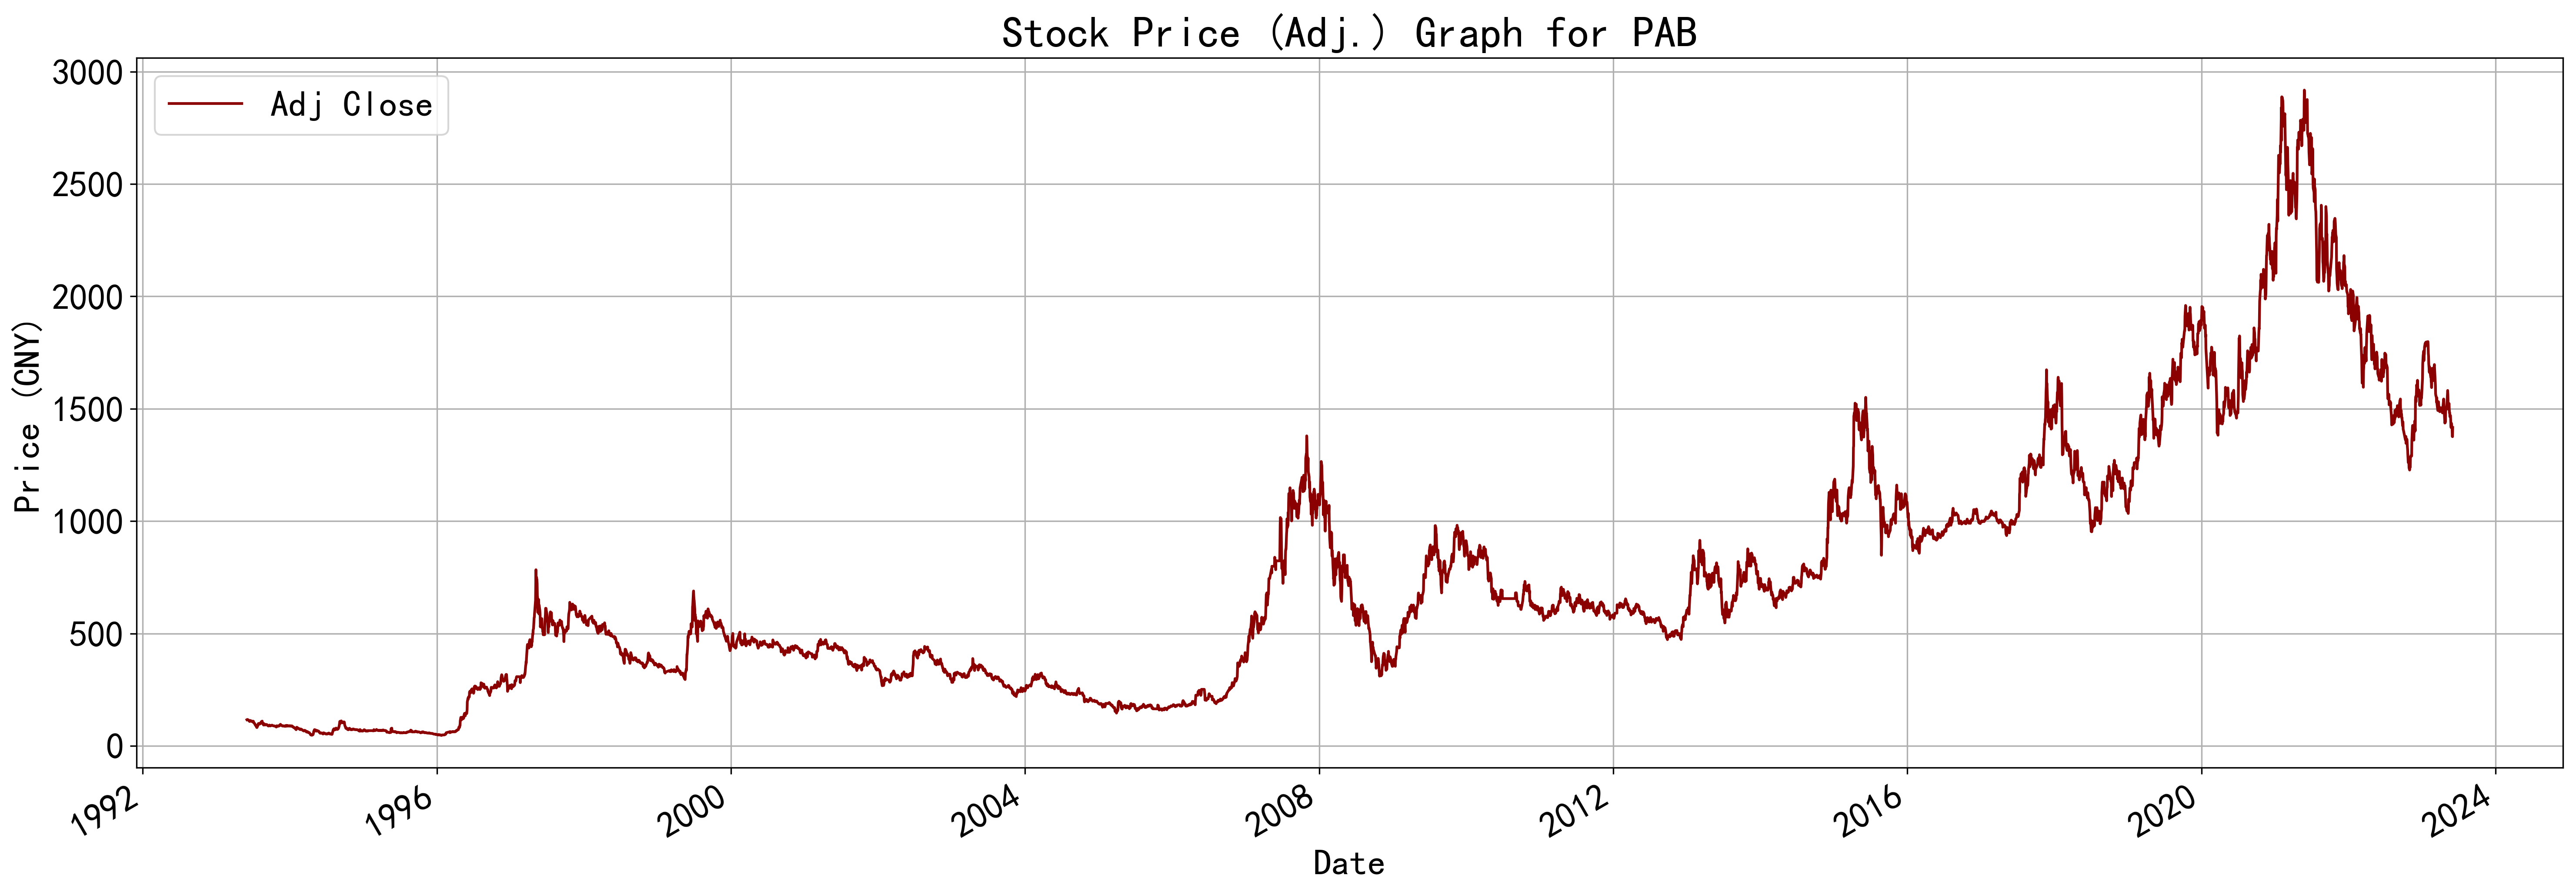

In [12]:
# 设置图片字体大小
mpl.rcParams['font.size'] = 20
# 分辨率参数-dpi，画布大小参数-figsize
plt.figure(dpi=300,figsize=(24,8))
# 获取折线图对象
line_plot = PAB["Adj Close"].plot(grid=True)
# 设置折线颜色为深红色
line_plot.lines[0].set_color('darkred')
# 添加标题
plt.title("Stock Price (Adj.) Graph for PAB", fontweight='bold')
# 添加纵轴标签
plt.ylabel("Price (CNY)", fontweight='bold') 
# 添加图例
plt.legend()
# 显示图形
plt.show()

#### 1.2.3 绘制某一时间段的K线图（蜡烛图）

首先选取时间段

In [13]:
#提取2023年1月到5月的数据

PAB_time1 = PAB.loc['2023-01':'2023-05']

PAB_time1.head(10)

,Open,High,Low,Close,Adj Close,Swing,Swing%,Volume,No.,Turnover,Turnover%,MV
Date,,,,,,,,,,,,
2023-01-03,13.20,13.85,13.05,13.77,1634.88,0.61,0.0464,219412794,153969,297154.70,0.0113,26721949.36
2023-01-04,13.71,14.42,13.63,14.32,1700.18,0.55,0.0399,218968253,145553,311072.94,0.0113,27789274.86
2023-01-05,14.40,14.74,14.37,14.48,1719.18,0.16,0.0112,166542518,110434,241727.24,0.0086,28099769.55
2023-01-06,14.50,14.72,14.48,14.62,1735.80,0.14,0.0097,119574471,88527,174791.52,0.0062,28371452.41
2023-01-09,14.75,14.88,14.52,14.80,1757.17,0.18,0.0123,105765911,85023,156136.85,0.0055,28720758.93
2023-01-10,14.76,14.89,14.39,14.44,1714.43,-0.36,-0.0243,126942339,109154,185109.37,0.0065,28022145.88
2023-01-11,14.45,14.78,14.39,14.67,1741.74,0.23,0.0159,83056612,77446,121745.08,0.0043,28468482.00
2023-01-12,14.77,14.77,14.53,14.67,1741.74,0.00,0.0000,62569484,72630,91436.77,0.0032,28468482.00
2023-01-13,14.67,14.95,14.55,14.95,1774.98,0.28,0.0191,94908583,79788,140718.11,0.0049,29011847.71


**绘制基础蜡烛图**

<Mpf_Figure size 6400x4800 with 0 Axes>

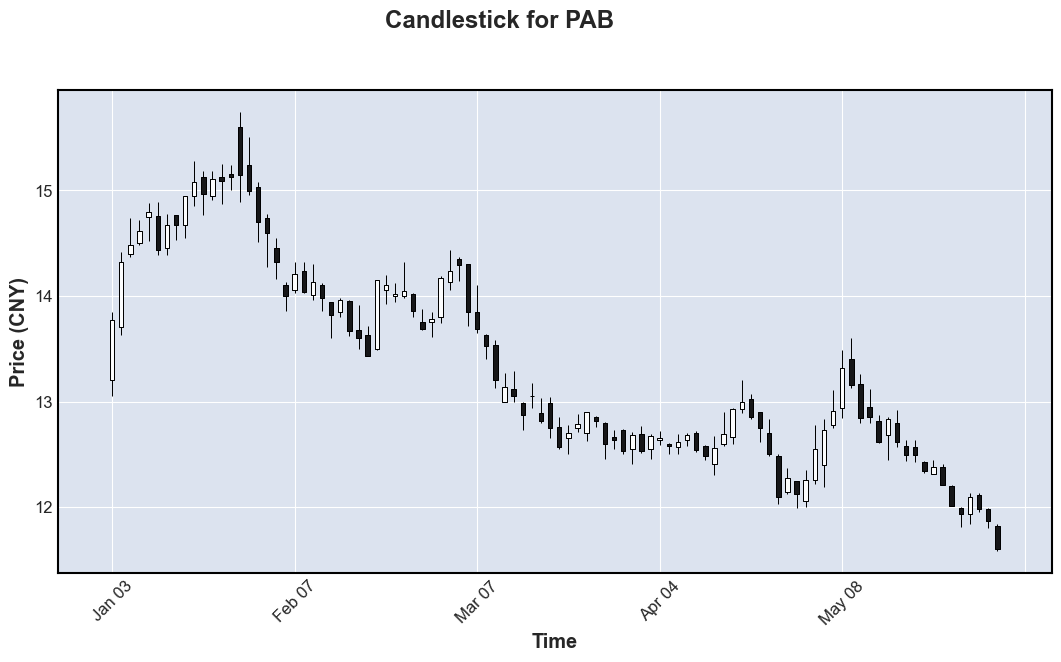

In [14]:
# 创建一个新的图形对象，并指定分辨率
fig = mpf.figure(dpi=1000)
# 绘制蜡烛图，同时设置标题、横纵坐标标签、图形大小比例
mpf.plot(
    PAB_time1,
    type="candle",
    title="Candlestick for PAB",
    xlabel="Time",
    ylabel="Price (CNY)",
    figscale=1.2,
    figratio=(12, 6)
)
# 显示图形
mpf.show()

**调整K线图的风格样式**

In [15]:
# 获取可用的图形样式列表
styles = mpf.available_styles()
print(styles)

['binance', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'yahoo']


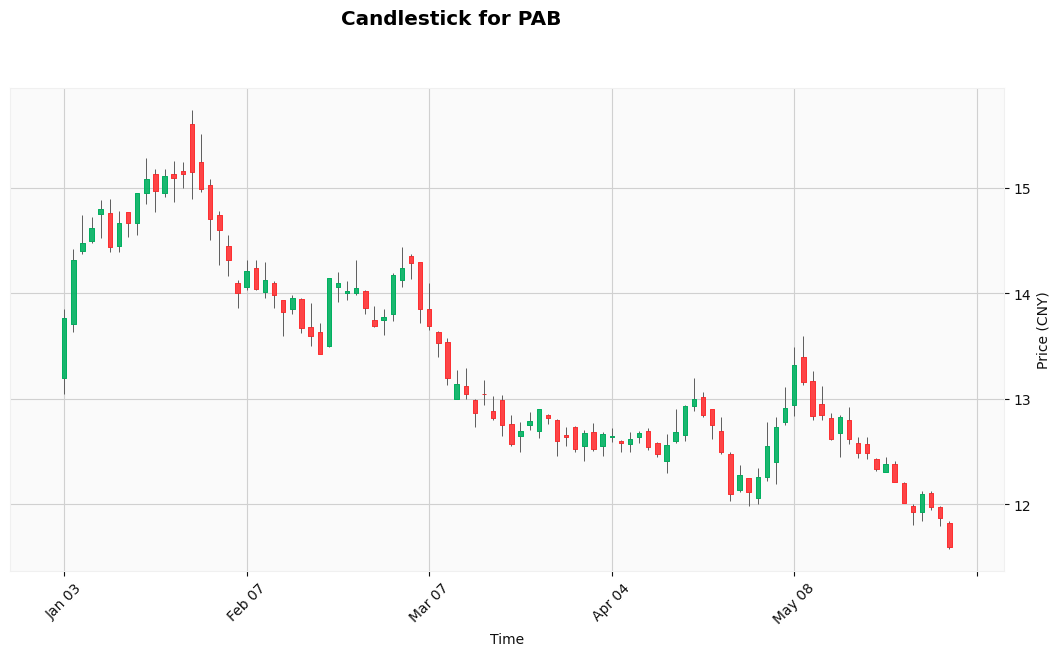

In [16]:
# 选择并应用图形样式
mpf.plot(
    PAB_time1,
    type="candle",
    title="Candlestick for PAB",
    xlabel="Time",
    ylabel="Price (CNY)",
    style="yahoo",
    figscale=1.2,
    figratio=(12, 6)
)

**在K线图下方添加成交量**

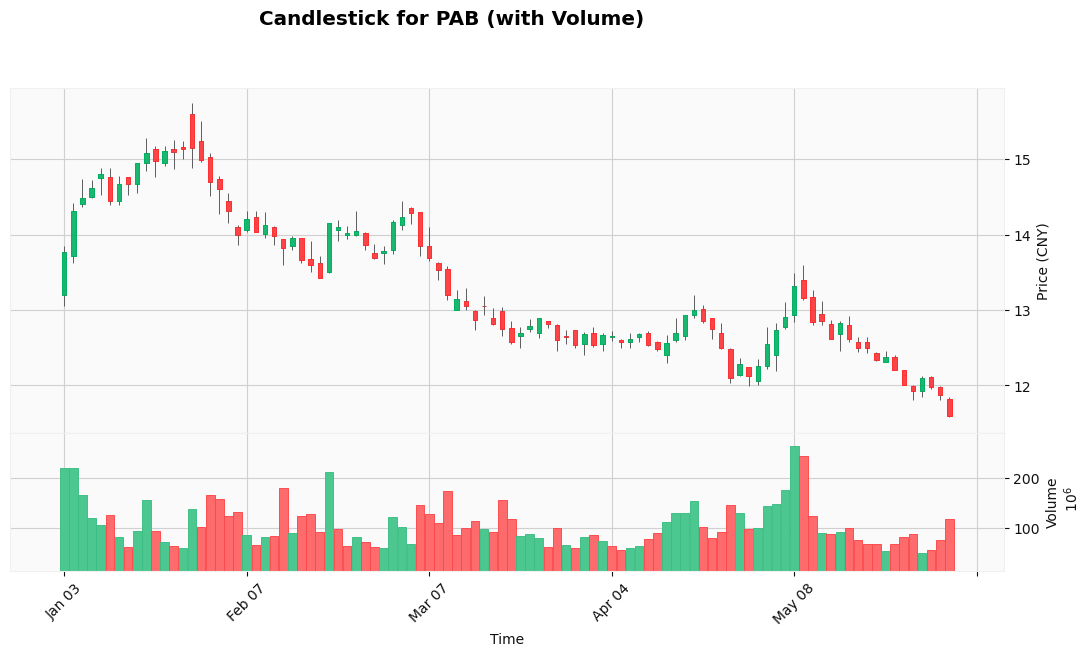

In [17]:
mpf.plot(
    data=PAB_time1,
    type="candle",
    title="Candlestick for PAB (with Volume)",
    xlabel="Time",
    ylabel="Price (CNY)",
    style="yahoo",
    volume=True,
    ylabel_lower="Volume", # 在K线图下方绘制成交量
    figscale=1.2,
    figratio=(12, 6)
)

**在K线图中添加移动平均线（MA）**

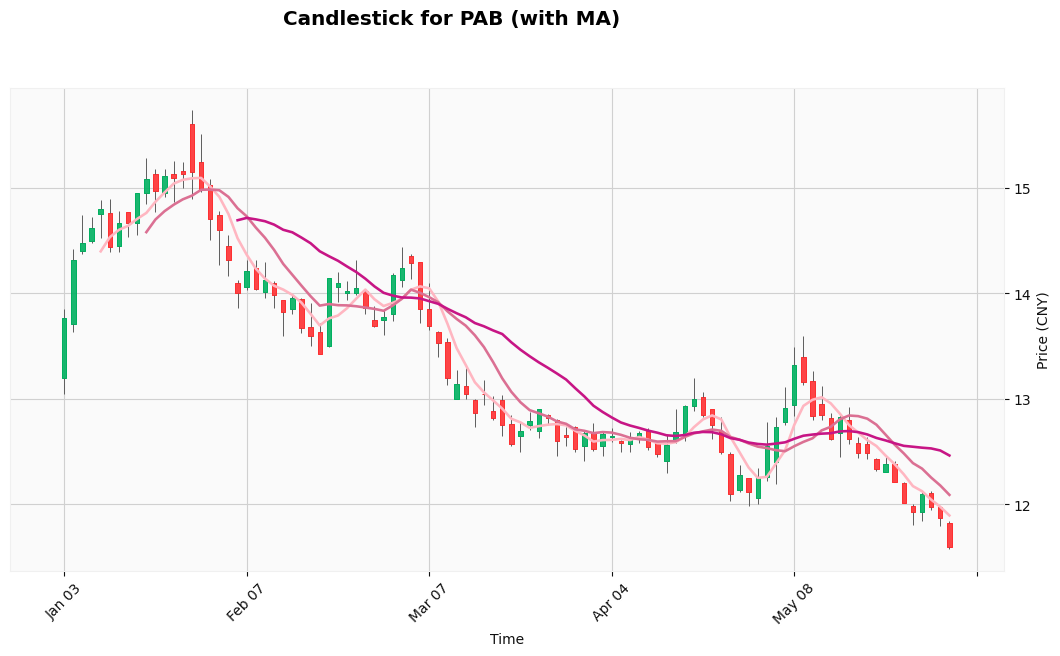

In [18]:
# 分别创建5日、10日、20日的移动平均线
ma5 = mpf.make_addplot(PAB_time1["Close"].rolling(5).mean(), color="lightpink")
ma10 = mpf.make_addplot(PAB_time1["Close"].rolling(10).mean(), color="palevioletred")
ma30 = mpf.make_addplot(PAB_time1["Close"].rolling(20).mean(), color="mediumvioletred")

mpf.plot(
    data=PAB_time1,
    type="candle",
    title="Candlestick for PAB (with MA)",
    xlabel="Time",
    ylabel="Price (CNY)",
    style="yahoo",
    figscale=1.2,
    figratio=(12, 6),
    addplot=[ma5, ma10, ma30],
)

**在对股价进行分析后，我们将针对收盘价进行股价预测，为了测试不同算法对于股价预测的效率，我们选取了三种目前在股价预测领域较有代表性的算法，分别是KNN邻近算法，ARIMA时间序列预测算法，以及基于循环神经网络的LSTM算法。**

## 2.KNN算法

In [19]:
from sklearn.preprocessing import MinMaxScaler
import copy
#knn算法
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### 2.1 数据预处理

In [20]:
# 读取Excel文件
filename = 'stock_price_cleaned.xlsx'
stock = pd.read_excel(filename, sheet_name='Sheet1')

进行分类

In [21]:
# 分类
stock['Open-Close'] = stock['Open'] - stock['Close']
stock['volatility'] = (stock['High'] - stock['Low'] / stock['Close'].shift(1))  
stock['Volume_change'] = (stock['Volume'] - stock['Volume'].shift(1))  

stock.head()

,Date,Open,High,Low,Close,Adj Close,Swing,Swing%,Volume,No.,Turnover,Turnover%,MV,Open-Close,volatility,Volume_change
0,1993-06-01,29.1,29.50,28.6,28.85,116.94,-0.25,-0.0085,1877100,0,5445.21,0.0100,777270.64,0.25,NaN,NaN
1,1993-06-02,28.8,29.10,28.6,29.00,117.55,0.15,0.0051,1148400,0,3307.81,0.0061,781311.91,-0.20,28.108666,-728700.0
2,1993-06-03,29.0,29.20,28.9,29.10,117.96,0.10,0.0034,1506000,0,4373.29,0.0080,784006.09,-0.10,28.203448,357600.0
3,1993-06-04,29.1,29.15,28.8,28.90,117.15,-0.20,-0.0068,1124000,0,3253.10,0.0060,778617.73,0.20,28.160309,-382000.0
4,1993-06-05,28.9,28.90,28.9,28.90,117.15,0.00,0.0000,77493,0,223.95,0.0004,778617.73,0.00,27.900000,-1046507.0


归一化，平滑数据

In [22]:
 #进行归一化处理
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Open-Close', 'Volume_change', 'volatility', 'Swing%', 'Turnover%']
scaler = MinMaxScaler()

for column in columns_to_normalize:
    scaler.fit(stock[[column]])
    stock[f'normalized_{column}'] = scaler.transform(stock[[column]])
    print(stock[f'normalized_{column}'])
    

0       0.490542
1       0.433796
2       0.446406
3       0.484237
4       0.459016
          ...   
7298    0.475410
7299    0.472888
7300    0.486759
7301    0.460277
7302    0.427491
Name: normalized_Open-Close, Length: 7303, dtype: float64
0            NaN
1       0.432013
2       0.433815
3       0.432588
4       0.431486
          ...   
7298    0.442284
7299    0.466044
7300    0.502141
7301    0.360824
7302    0.512627
Name: normalized_Volume_change, Length: 7303, dtype: float64
0            NaN
1       0.544348
2       0.546509
3       0.545526
4       0.539590
          ...   
7298    0.157451
7299    0.154318
7300    0.151112
7301    0.147103
7302    0.153421
Name: normalized_volatility, Length: 7303, dtype: float64
0       0.381917
1       0.413939
2       0.409936
3       0.385919
4       0.401931
          ...   
7298    0.378620
7299    0.380268
7300    0.348481
7301    0.399812
7302    0.470921
Name: normalized_Swing%, Length: 7303, dtype: float64
0       0.051282
1   

In [23]:
stock1 = stock.dropna()
stock1.shape

(7302, 21)

划分训练集与测试集

In [24]:
X = stock1[['normalized_Open-Close', 'normalized_volatility', 'normalized_Volume_change', 'normalized_Swing%','Turnover%']]
y = stock1['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 2.2 数据建模

#### 2.2.1 参数迭代

利用**K-fold交叉检验**来确定K值，即将数据集分成k个相等的子集，每次选取其中一个子集作为验证集，其余k-1个子集作为训练集，进行k次实验。对于每个k值，计算k次实验的平均误差（例如分类准确率、平均绝对误差等），选择平均误差最小的k值作为模型的参数。

In [25]:
from sklearn.model_selection import KFold
k_array=[3,5,7,9,11,13,15]

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

mse_scores = []
for k in k_array:
    fold_mse_scores = []
    for train_idx, test_idx in kf.split(X):
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        fold_mse_scores.append(mse)
    mse_scores.append((k, sum(fold_mse_scores)/n_folds))

best_k, best_mse = min(mse_scores, key=lambda x: x[1])
print(f"Best k value: {best_k}")
print(f"Average MSE over {n_folds}-fold CV: {best_mse}")

Best k value: 5
Average MSE over 5-fold CV: 0.12488925115242888


根据kfold检验得到最终参数为k=5

#### 2.2.2 模型训练与预测

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsRegressor(n_neighbors=5)
knn1.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

y_pred = knn1.predict(X_test)

### 2.3 预测结果可视化

In [27]:
train_data_len = X_train.shape[0]
train_data_len

5842

In [28]:
closing = stock1[['Date','Close']]
closing = closing.set_index('Date')
training = closing[:train_data_len]
testing = closing[train_data_len:]
testing['Predicted_close'] = y_pred
testing#展示预测（测试）数据

,Close,Predicted_close
Date,,
2017-06-05,9.03,28.690
2017-06-06,9.04,28.486
2017-06-07,9.13,28.602
2017-06-08,9.13,26.478
2017-06-09,9.15,27.730
...,...,...
2023-05-29,11.98,12.090
2023-05-30,11.87,12.998
2023-05-31,11.60,12.776


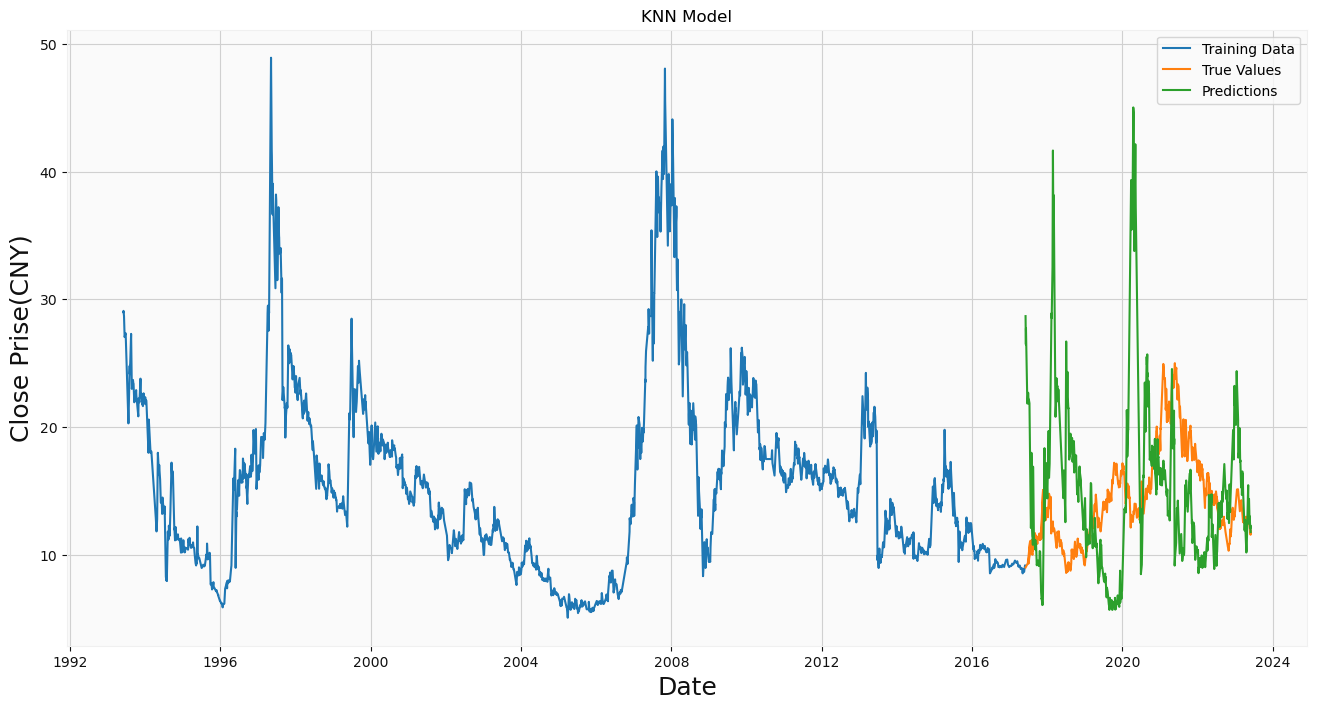

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.title('KNN Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Prise(CNY)', fontsize=18)
plt.plot(training['Close'])
plt.plot(testing[['Close', 'Predicted_close']])
plt.legend(['Training Data','True Values','Predictions'])
plt.show()

## 3. ARIMA时间序列预测

In [30]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [31]:
stock_price1 = pd.read_excel('stock_price_cleaned.xlsx')
stock_price1["Date"]=pd.to_datetime(stock_price1.Date,format="%Y-%m-%d")
stock_price1.set_index("Date",inplace = True)
stock_price1.head()

,Open,High,Low,Close,Adj Close,Swing,Swing%,Volume,No.,Turnover,Turnover%,MV
Date,,,,,,,,,,,,
1993-06-01,29.1,29.50,28.6,28.85,116.94,-0.25,-0.0085,1877100,0,5445.21,0.0100,777270.64
1993-06-02,28.8,29.10,28.6,29.00,117.55,0.15,0.0051,1148400,0,3307.81,0.0061,781311.91
1993-06-03,29.0,29.20,28.9,29.10,117.96,0.10,0.0034,1506000,0,4373.29,0.0080,784006.09
1993-06-04,29.1,29.15,28.8,28.90,117.15,-0.20,-0.0068,1124000,0,3253.10,0.0060,778617.73
1993-06-05,28.9,28.90,28.9,28.90,117.15,0.00,0.0000,77493,0,223.95,0.0004,778617.73


In [32]:
# 选取close列，并创建一个新的数据集（只包含Close）
data = stock_price1.loc[:, [ 'Close']]

# 查看新数据集的前几行
print(data.head())

            Close
Date             
1993-06-01  28.85
1993-06-02  29.00
1993-06-03  29.10
1993-06-04  28.90
1993-06-05  28.90


### 3.1 平稳性检验

#### 3.1.1 ADF检验

In [33]:
from statsmodels.tsa.stattools import adfuller

# 对原始数据进行ADF检验
adf_result = adfuller(data)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# 根据p值判断是否平稳
if adf_result[1] < 0.05:
    print("时间序列是平稳的。")
else:
    print("时间序列是非平稳的。")

ADF Statistic: -3.664790410558132
p-value: 0.004636567180118594
时间序列是平稳的。


#### 3.1.2 数据平稳性检验（可视化分析：绘制原始时间序列图）

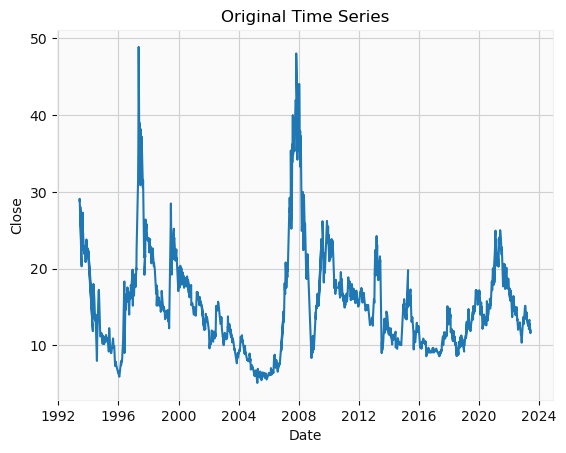

In [34]:
# 数据可视化
import matplotlib.pyplot as plt

plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Original Time Series')
plt.show()

+ 观察上图可以发现数据整体是比较平稳的，但存在一定的周期性变化，后续可根据需要尝试采用差分进行调整。

#### 3.1.3 数据平稳性检验：绘制滚动统计图

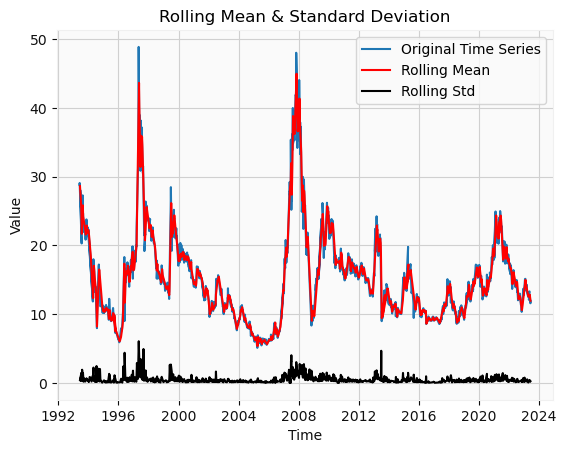

In [35]:
import pandas as pd

window_size = 10

# 计算滚动均值和滚动标准差
rolling_mean = data.rolling(window=window_size).mean()
rolling_std = data.rolling(window=window_size).std()

# 绘制滚动均值和滚动标准差图
plt.plot(data, label='Original Time Series')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

+ 观察到滚动均值有较为明显的波动，可能说明数据本身存在着一定的周期性变化；
+ 滚动标准差在某些时间段内波动较大，大部分时间变化较小，说明数据总体波动性比较稳定，但是也存在少量异常值或周期性波动；
+ 总体而言数据是较为平稳的，但是后续也可以进行一阶差分进一步提升其稳定性

### 3.2 数据预处理与训练集划分

In [36]:
# 划分训练集和测试集 (8:2)
train_size = int(len(data) * 0.8)
train = data[:train_size]
test= data[train_size:]

In [37]:
# 最大最小归一化
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

### 3.3 参数调整

In [38]:
# 计算差分以使数据平稳
import numpy as np
diff_data = np.diff(train_scaled.reshape(-1))

In [39]:
# 计算ACF和PACF
from statsmodels.tsa.stattools import acf, pacf
acf_values = acf(diff_data)
pacf_values = pacf(diff_data)

<Figure size 1200x600 with 0 Axes>

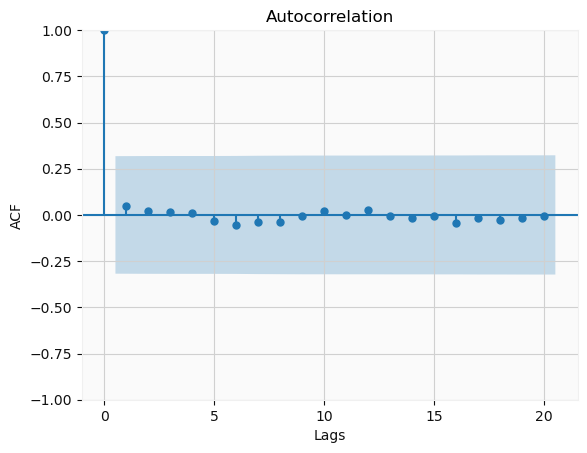

In [40]:
# 绘制ACF图
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12, 6))
plot_acf(acf_values, lags=20)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

<Figure size 1200x600 with 0 Axes>

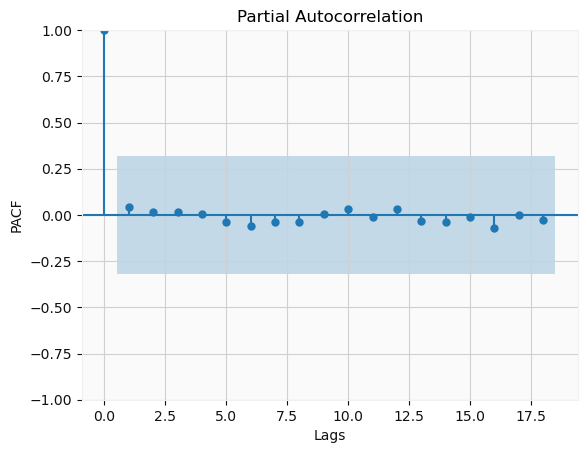

In [41]:
# 绘制PACF图
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12, 6))
plot_pacf(pacf_values, lags=18)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

In [42]:
# 使用AIC选择最佳ARIMA模型参数
best_aic = np.inf
best_order = None
for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                model = ARIMA(train_scaled, order=(p, d, q))
                result = model.fit()
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, d, q)
            except:
                continue

print("Best ARIMA order:", best_order)

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best ARIMA order: (2, 0, 1)


### 3.4 模型建立

In [43]:
# 使用最佳参数拟合模型
best_model = ARIMA(train_scaled, order=best_order)
best_result = best_model.fit()

In [44]:
# 预测测试集
predictions = best_result.predict(start=len(train_scaled), end=len(train_scaled) + len(test_scaled) - 1, dynamic=False)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))# 反归一化返回预测结果

### 3.5 模型结果与可视化

**模型总结**

In [45]:
print(best_result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5842
Model:                 ARIMA(2, 0, 1)   Log Likelihood               17402.366
Date:                Tue, 27 Jun 2023   AIC                         -34794.731
Time:                        00:55:24   BIC                         -34761.367
Sample:                             0   HQIC                        -34783.129
                               - 5842                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2356      0.056      4.215      0.000       0.126       0.345
ar.L1          1.4466      0.108     13.345      0.000       1.234       1.659
ar.L2         -0.4486      0.108     -4.152      0.0

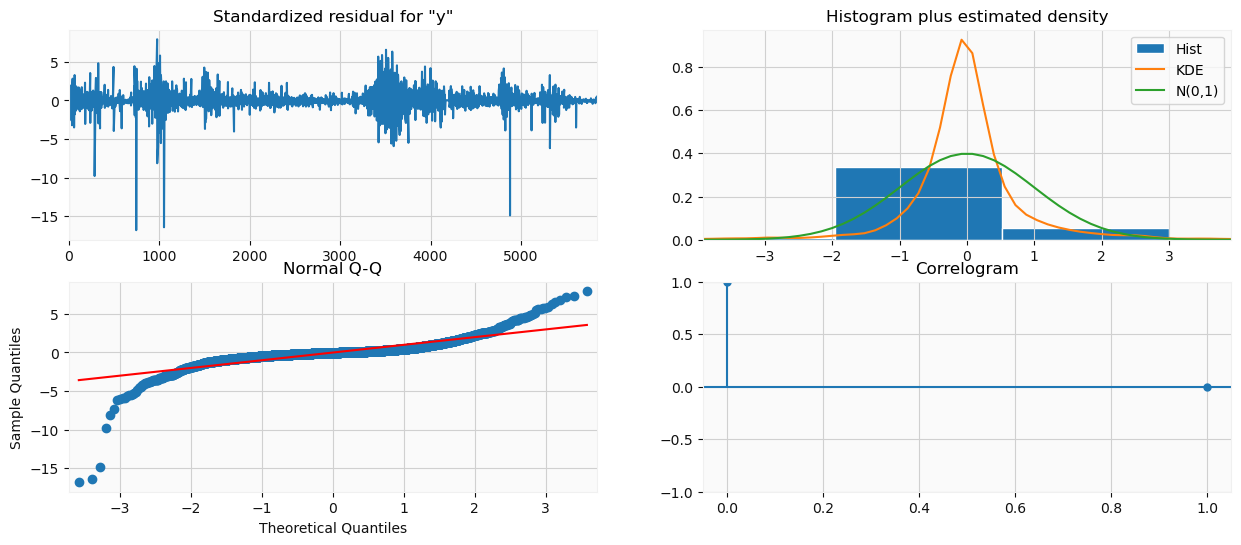

In [46]:
best_result.plot_diagnostics(lags=1, figsize=(15,6))
plt.show() 

In [47]:
test['Predictions'] = predictions
test

,Close,Predictions
Date,,
2017-06-02,9.17,9.213823
2017-06-05,9.03,9.237265
2017-06-06,9.04,9.260488
2017-06-07,9.13,9.283565
2017-06-08,9.13,9.306529
...,...,...
2023-05-29,11.98,15.392618
2023-05-30,11.87,15.392717
2023-05-31,11.60,15.392816


**预测结果可视化**

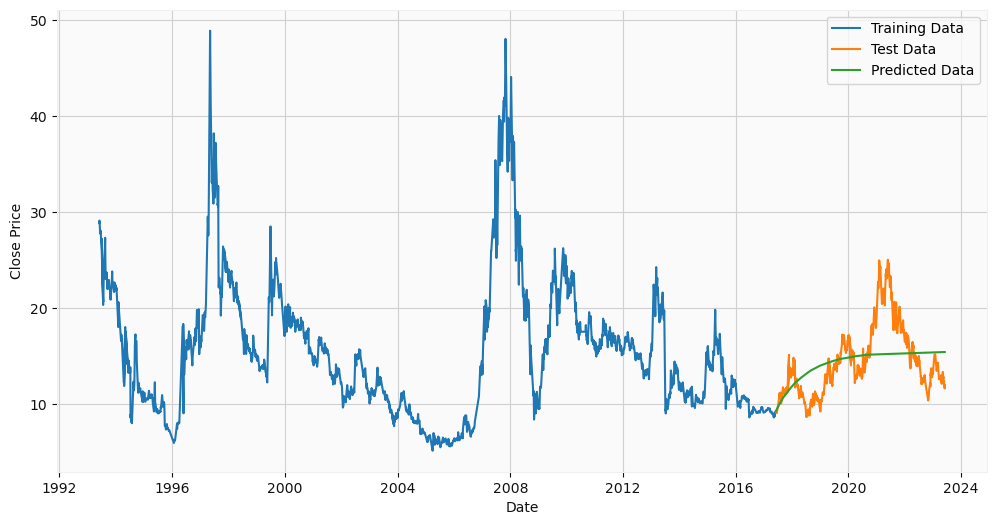

In [48]:
# 将预测结果和实际结果绘制在同一张图上
plt.figure(figsize=(12, 6))
plt.plot(train[:train_size], label="Training Data")
plt.plot(test['Close'], label="Test Data")
plt.plot(test['Predictions'],label = 'Predicted Data')
#plt.plot(predictions, label="Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

**总结：**


在本次实验中，我尝试使用ARIMA模型对股价进行预测。虽然ARIMA模型在某些时间序列分析任务中表现良好，但在预测股价方面，结果并不令人满意。以下是本次实验的总结和可能的原因。

* 首先对股价数据进行了平稳性检验，通过可视化和ADF检验，来判断数据是否平稳。观察到数据总体较为平稳但也有一定波动性，因此对其进行差分处理。接着，计算了自相关函数（ACF）和偏自相关函数（PACF）来确定ARIMA模型的p和q参数范围，并使用AIC标准来寻找最佳参数组合。

* 在进行寻找参数的过程中，首先是根据PACF图和ACF图来确定p、q的range，由于两图都是在第一个之后点之后迅速衰减至接近零，因此初步选取range（1，1，1），得到的结果为（0，0，0），rmse为1.005795。然后尝试将该范围扩大为（2，2，2），得到的Best ARIMA order为（1，0，1），rmse为0.196927。进一步，尝试将range调整为（3，2，3），得到Best ARIMA order为（2，0，1），rmse为0.125025。紧接着将其调整到（4，2，4），得到Best ARIMA order依然为（2，0，1），rmse保持不变。但当被调整为（5，2，5）时，rmse则迅速变大，结果不理想。因此我最终选择以（3，2，3）作为我的最终range取值，此时rmse最小，为0.125025。

* 在调整多次后，最优预测结果其实和测试集还相差很远，准确度较低，这可能是由于以下原因：

1. 股价的非线性和复杂性：股价受到许多因素的影响，如市场情绪、宏观经济因素、公司业绩等。这些因素之间的相互作用可能导致股价表现出复杂的非线性模式，而ARIMA模型可能无法捕捉到这种非线性。

2. 效率市场假说：根据效率市场假说，股价反映了所有可获得的信息，未来的价格变化无法通过分析过去的价格数据来预测。在这种情况下，使用基于历史价格数据的ARIMA模型进行预测可能难以获得满意的结果。

3. 参数调整和模型选择：虽然我们使用了网格搜索方法来确定ARIMA模型的最佳参数组合，但由于搜索空间和计算资源的限制，我们可能无法找到最佳模型。此外，ARIMA模型的性能受到参数选择的影响，因此，即使我们通过调整参数获得了相对较好的结果，也不能保证模型在实际应用中的表现。

综上所述，虽然我尝试使用ARIMA模型对股价进行预测，但结果并不理想。因此我们在后续选取了其他更复杂的模型，如LSTM神经网络等，以提高预测准确度。同时，在未来我们还可以尝试结合其他类型的数据（如新闻、社交媒体数据等）来捕捉市场情绪和其他影响股价的因素。

## 4.LSTM算法

In [49]:
%matplotlib inline
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [50]:
stock_price = pd.read_excel('stock_price_cleaned.xlsx')
stock_price["Date"]=pd.to_datetime(stock_price.Date,format="%Y-%m-%d")
stock_price.set_index('Date',inplace= True)
stock_price.head()

,Open,High,Low,Close,Adj Close,Swing,Swing%,Volume,No.,Turnover,Turnover%,MV
Date,,,,,,,,,,,,
1993-06-01,29.1,29.50,28.6,28.85,116.94,-0.25,-0.0085,1877100,0,5445.21,0.0100,777270.64
1993-06-02,28.8,29.10,28.6,29.00,117.55,0.15,0.0051,1148400,0,3307.81,0.0061,781311.91
1993-06-03,29.0,29.20,28.9,29.10,117.96,0.10,0.0034,1506000,0,4373.29,0.0080,784006.09
1993-06-04,29.1,29.15,28.8,28.90,117.15,-0.20,-0.0068,1124000,0,3253.10,0.0060,778617.73
1993-06-05,28.9,28.90,28.9,28.90,117.15,0.00,0.0000,77493,0,223.95,0.0004,778617.73


### 4.1 数据预处理与训练集划分

In [51]:
#创建一个只有收盘价的dataframe
import math
close_price = stock_price.filter(['Close'])
#将dataframe转为numpy数组，为数据集
dataset = close_price.values
dataset.shape

(7303, 1)

In [52]:
#计算行数得到训练数据集长度
training_data_len = math.ceil( len(dataset) * .8)#训练数据集比例选为80%
training_data_len

5843

In [53]:
#数据预处理：最大最小归一化
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.54223744],
       [0.5456621 ],
       [0.54794521],
       ...,
       [0.14840183],
       [0.14817352],
       [0.15593607]])

In [54]:
# 创建训练数据集，从处理后的数据中得到训练集长度（5843）个训练数据
train_data = scaled_data[0:training_data_len , :]

#接下来把时间序列数据转换为监督式学习问题的形式，将数据转化为x列和y列
x_train = []
y_train = []

time_stamp = 150
#用前面的150个数据点作为输入（x_train），并将第i个数据点的值作为相应的输出（y_train）
for i in range(time_stamp,len(train_data)):#每个输入样本都有150个特征，
    x_train.append(train_data[i-time_stamp:i,0])
    y_train.append(train_data[i,0])

# 每个特征都是前面时间步长的数据点，而输出标签是当前时间步长的数据点

In [55]:
# 转成numpy array的形式
x_train = np.array(x_train)
y_train = np.array(y_train)

### 4.2 模型建立及预测

In [56]:
model = Sequential()#定义序列模型，第一层LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))#传给下一个LSTM层
model.add(LSTM(units=50))#添加了另一个LSTM层，该层不需要返回完整的序列
model.add(Dense(1))#添加了一个密集连接层，用于将LSTM层的输出映射到单个输出值

In [57]:
# 编译模型，选取MSE均方误差作为损失函数，adam优化器
model.compile(loss="mean_squared_error", optimizer="adam")

#训练模型，fit一下
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

5693/5693 - 199s - loss: 6.7077e-04 - 199s/epoch - 35ms/step


In [58]:
# 创建测试数据集
test_data = scaled_data[training_data_len - time_stamp: , :]

#从test_data数组中提取前150个时间步的收盘价格，添加到x_test列表中作为输入量
x_test = []
y_test = dataset[training_data_len: , :]#输出量包含所有剩余时间步收盘价格的一维数组
for i in range(time_stamp, len(test_data)):
    x_test.append(test_data[i-time_stamp:i,0])

In [59]:
x_test = np.array(x_test)
# 转成3D张量模式的 (samples, timesteps, features)，方便输入模型
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(1460, 150, 1)

In [60]:
#进行预测
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)#反归一化，还原股价

46/46 [==============================] - 2s 23ms/step


### 4.3 模型结果与可视化

In [61]:
train = close_price[:training_data_len]
valid = close_price[training_data_len:]
valid['Predictions'] = prediction
valid

,Close,Predictions
Date,,
2017-06-05,9.03,8.919020
2017-06-06,9.04,8.819217
2017-06-07,9.13,8.765946
2017-06-08,9.13,8.805965
2017-06-09,9.15,8.847079
...,...,...
2023-05-29,11.98,11.744390
2023-05-30,11.87,11.735256
2023-05-31,11.60,11.652639


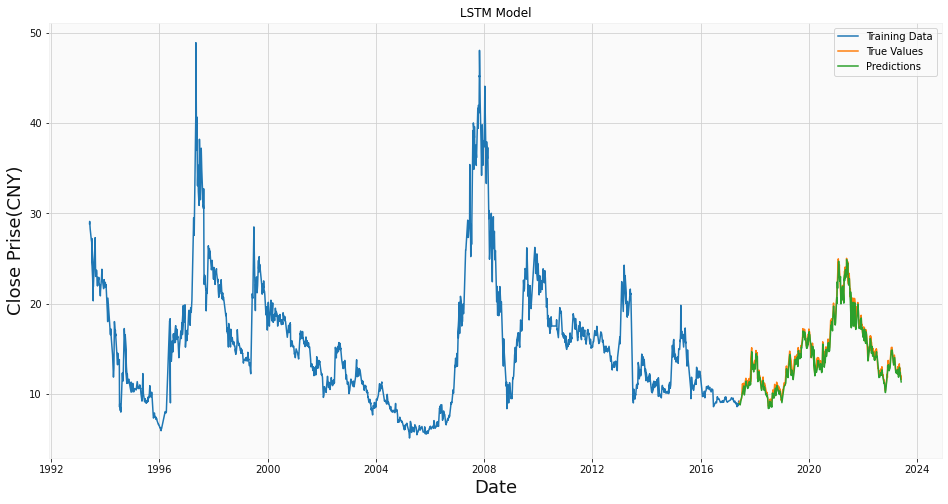

In [62]:
#结果可视化一下
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Prise(CNY)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training Data','True Values','Predictions'])
plt.show()

因为对测试数据拟合效果十分理想，我们希望将其进一步推广对未来股价进行预测。

### 4.4 预测未来股价

In [63]:
# 对未来150天（五个月）的股价进行预测
predict_xlist = []#添加预测x列表
predict_y = []#添加预测y列表
timesteps=150
length=150 # 预测未来150天的股价

#把最后60个数据加入xlist
predict_xlist.extend(scaled_data[scaled_data.shape[0]-timesteps:scaled_data.shape[0],0].tolist())

while len(predict_y) < length:
    #为了预测将来的值，所以每次构造的x要取这个列表中最后的timesteps个数据
    predictx = np.array(predict_xlist[-timesteps:])
    predictx = np.reshape(predictx,(1,timesteps,1))#变换格式，适应LSTM模型
    #预测新值
    lstm_predict = model.predict(predictx)
    #滚动预测
    predict_xlist.extend(lstm_predict[0])#将新预测出来的predict_steps个数据，加入predict_xlist列表，用于下次预测
    #从归一化数据转回原本股价
    lstm_predict = scaler.inverse_transform(lstm_predict)
    predict_y.extend(lstm_predict[0])# 把每次预测出来的值加入predict_y，直到预测150天为止

1/1 [==============================] - 0s 23ms/step


<AxesSubplot:>

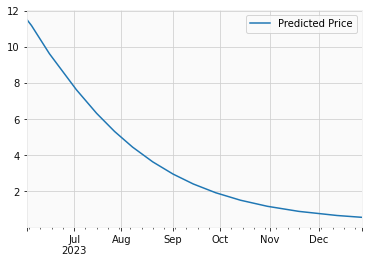

In [64]:
# 展示对未来150天预测结果
# 时间跳过周末休市
future_150_days = pd.DataFrame({'Predicted Price': predict_y}, index=pd.date_range(start='2023-06-02', periods=length, freq='B'))
future_150_days.plot()

**总结：**

该模型是三个模型中损失函数值最小的模型，从模型拟合度上来说基本没有问题，在test数据集上的优异表现也证明其过拟合的可能性比较低。但是在对未来的预测上，如果只用来预测未来一天或一周的数据，该模型的运行结果有一定的参考性；但如果用于长期预测，由于缺乏对其他变量的考虑，其表现并不乐观。

LSTM模型可以根据不同的参数进行调整，例如改变LSTM层的数量，添加dropout值或增加epoch的数量，但这些调整并不能保证LSTM模型的预测足够确定股价是涨还是跌。在本次作业的调参的过程中，一开始为了防止过拟合我加入了Dropout并将该参数设为0.2，发现30天预测结果的运行结果呈现规律的一次高估，一次低估，分别对未来股价呈现极端乐观以及极端悲观，显然对股票的涨跌毫无概念。后来删除dropout，再分别进行30日/60日/90日/150日/180日/240日股价预测，发现结果基本仍然呈现单调递增或递减的模式，仍然对涨跌没有概念，与现实中股票价格的上下波动走势差异极大，30日到90日预测线还勉强有逻辑性可言，而90日以后的运行结果呈现了完全不符合正常股价走向的单调下降的曲线走势，或许因为训练的timesstamp是150天，随着训练数据集中机器预测值的占比不断增加，模型结果走向就越来越极端和不合常理。

因此，虽然模型拟合度和测试结果非常好，但这只说明我们可以根据以前的数据对算法进行验证，但并不代表其对现实世界的预测就一定合理有效，在现实中，股票价格受到有关公司的新闻以及其他因素的影响，如公司的非货币化或合并/分拆。还有一些无形因素，往往是事先无法预测的。

不过，这也有可能是因为该模型是只考虑了一项历史数据，即收盘价的单变量的预测模型，若加入其他影响变量如情感因子、开盘价、大盘走势等，或者加入对于涨跌概念的变量，或许模型预测结果的合理性能够得到提升，但总体来看，目前该模型无法实现对股价的有效预测。